In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### Example of a simple 3d plot

<IPython.core.display.Javascript object>


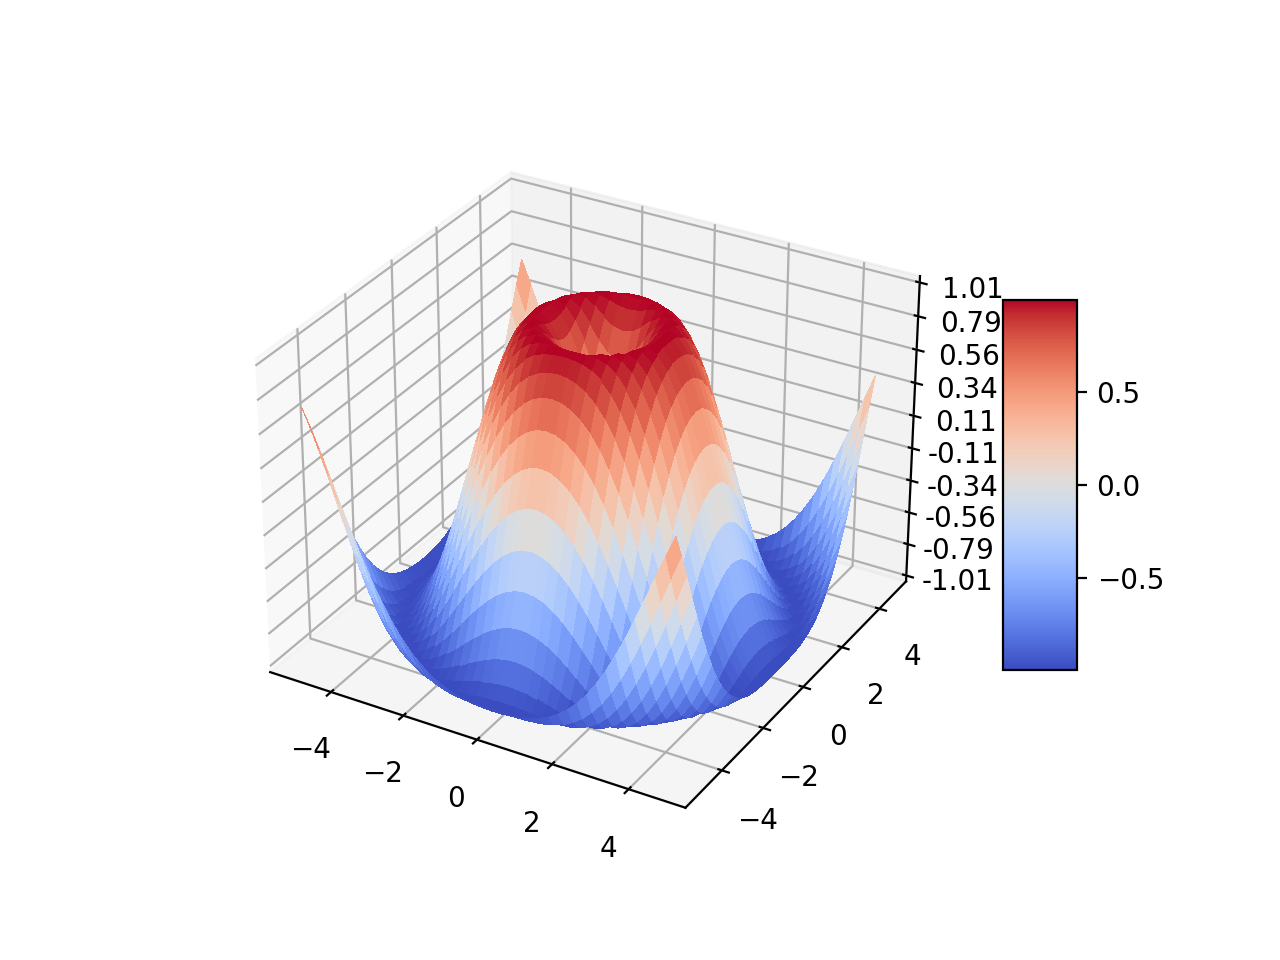

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Distribution params

In [129]:
mu0x = 1
mu0y = 1
sigma0x = 0.5
sigma0y = 0.5

mu1x = 2
mu1y = 4
sigma1x = 2
sigma1y = 1

### Plot distributions

In [131]:
def plot_distribution(mu_x, mu_y, sigma_x, sigma_y, pos):
    rv = stats.multivariate_normal(
        [mu_x, mu_y], 
        [[sigma_x, 0      ], 
         [0,       sigma_y]]
    )
    return rv.pdf(pos)
    
def plot_two_distributions(mu0x, mu0y, sigma0x, sigma0y, mu1x, mu1y, sigma1x, sigma1y):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    X = np.arange(-10, 10, 0.25)
    Y = np.arange(-10, 10, 0.25)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X, Y))
    
    Z = plot_distribution(mu1x, mu1y, sigma1x, sigma1y, pos)
    Z = Z + plot_distribution(mu0x, mu0y, sigma0x, sigma0y, pos)
    
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Customize the z axis.
    ax.set_zlim(0, 1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.01f}')
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()

<IPython.core.display.Javascript object>


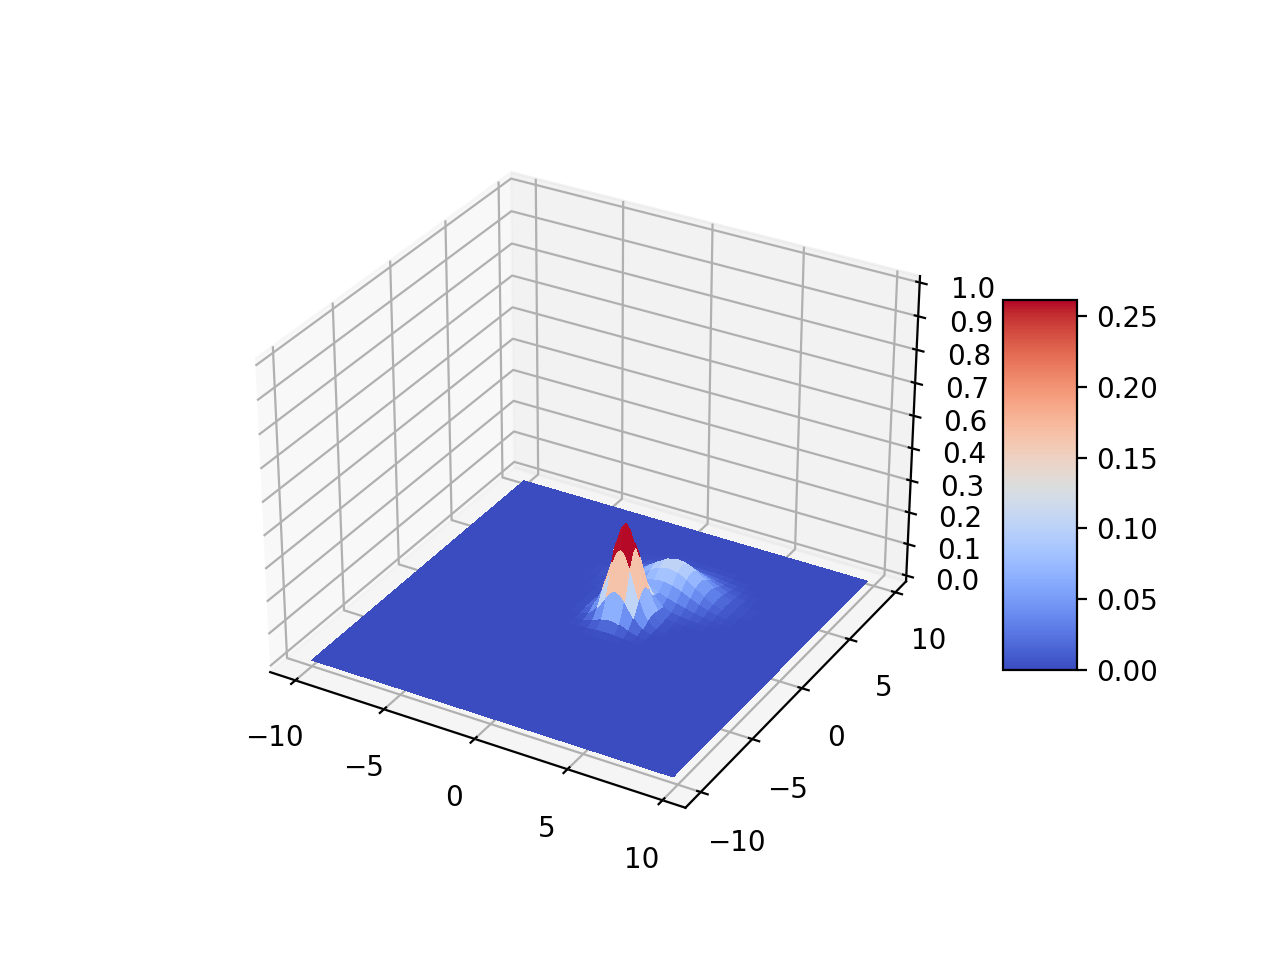

In [132]:
plot_two_distributions(mu0x, mu0y, sigma0x, sigma0y, mu1x, mu1y, sigma1x, sigma1y)